<a href="https://colab.research.google.com/github/ashish613/Live-mask-detection-/blob/main/Mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here i installed old versions of tensorflow and keras because when i use the trained model in my pc in jupyter notebook then i will be installing tensorflow old version(because there is no gpu in my system) therefore the versions should match.

In [16]:
pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 25kB/s 
     |████████████████████████████████| 3.9MB 57.0MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 
     |████████████████████████████████| 450kB 56.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=13fc37d43a74e01f4a5ac8769c7af433df9507b3232e6f0d63d2fe0d6a856817
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.4.0
    Uninstalling tensorboard-2.4.0:
      Successfully uninstalled tensorboard-2.4.0
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [1]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 9.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [2]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# for accuracy and loss graph
import matplotlib.pyplot as plt

import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

Using TensorFlow backend.


2.3.1
2.1.0


In [8]:
train_data_path = "/content/drive/MyDrive/Colab Notebooks/face mask detection /dataset/train"
validation_data_path = "/content/drive/MyDrive/Colab Notebooks/face mask detection /dataset/valid"

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [10]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(200, 200), # all images will be resized to 150x150
                                      batch_size=128,
                                      class_mode='binary')


Found 3649 images belonging to 2 classes.


In [11]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [12]:
valid_datagen = ImageDataGenerator(rescale=1./255)


valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(200,200),
                                  batch_size=128,
                                  class_mode='binary')

Found 806 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/cell_images/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


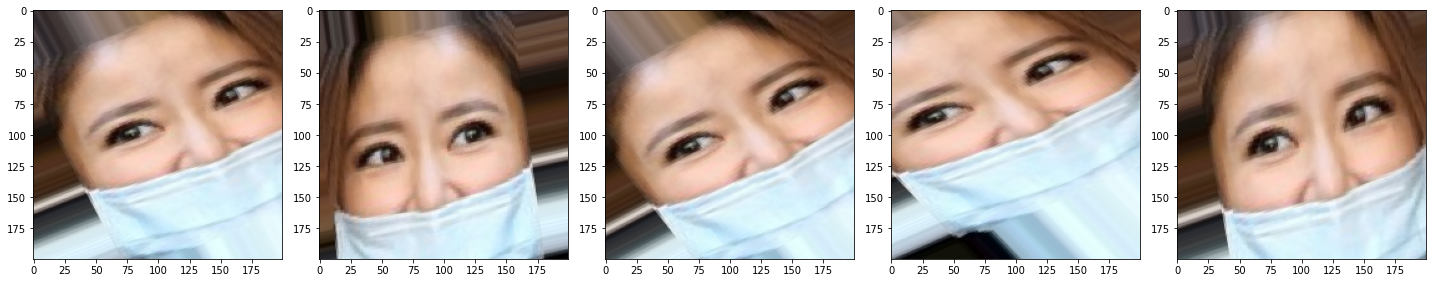

In [14]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [15]:
model_path = '/content/drive/MyDrive/Colab Notebooks/face mask detection/facemask_detection_model/facemask_detection_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200, 200, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(4,4)),
                                    keras.layers.Conv2D(filters=64, kernel_size=4),
                                    keras.layers.MaxPooling2D(pool_size=(3,3)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=2),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [17]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 196, 196, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 256)        

In [18]:
cnn_model.compile(optimizer = Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = cnn_model.fit(training_data, 
                          epochs=85, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list)

Epoch 1/85


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


29/29 [==============================] - 49s 2s/step - loss: 0.5148 - accuracy: 0.7429 - val_loss: 0.1654 - val_accuracy: 0.8462

Epoch 00001: val_accuracy improved from -inf to 0.84615, saving model to /content/drive/MyDrive/Colab Notebooks/face mask detection/facemask_detection_model/facemask_detection_model.h5
Epoch 2/85
29/29 [==============================] - 44s 2s/step - loss: 0.3439 - accuracy: 0.8704 - val_loss: 0.2042 - val_accuracy: 0.9367

Epoch 00002: val_accuracy improved from 0.84615 to 0.93672, saving model to /content/drive/MyDrive/Colab Notebooks/face mask detection/facemask_detection_model/facemask_detection_model.h5
Epoch 3/85
29/29 [==============================] - 44s 2s/step - loss: 0.3068 - accuracy: 0.8890 - val_loss: 0.3880 - val_accuracy: 0.9442

Epoch 00003: val_accuracy improved from 0.93672 to 0.94417, saving model to /content/drive/MyDrive/Colab Notebooks/face mask detection/facemask_detection_model/facemask_detection_model.h5
Epoch 4/85
29/29 [=========

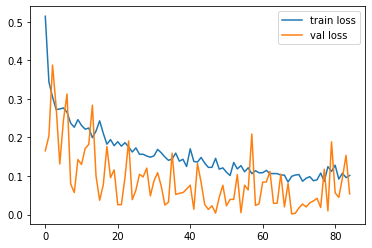

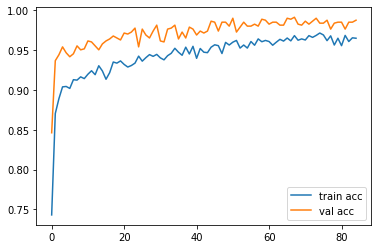

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history.history['loss'], label='train loss')
plt.plot(cnn_model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history.history['accuracy'], label='train acc')
plt.plot(cnn_model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')